In [45]:
import math
from scipy.stats import norm

def black_scholes_pricer(S, K, T, r, vol):
    d1 = (math.log(S/K) + (r + 0.5 * vol**2)*T ) / (vol * math.sqrt(T))
    d2 = d1 - (vol * math.sqrt(T))
    C = S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    P = K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return C, P

# Covered Call Strategy
def covered_call(S, K, T, r, vol):
    call_price, _ = black_scholes_pricer(S, K, T, r, vol)
    # Profit if the option is exercised
    profit_if_exercised = K - S + call_price
    # Profit if the option is not exercised
    profit_if_not_exercised = call_price
    return profit_if_exercised, profit_if_not_exercised

# Protective Put Strategy
def protective_put(S, K, T, r, vol):
    _, put_price = black_scholes_pricer(S, K, T, r, vol)
    # Cost of buying the put
    total_cost = S + put_price
    # Minimum value at expiration
    minimum_value = K
    return total_cost, minimum_value


In [49]:
S = 124.3  # Underlying Price
K = 800  # Strike Price
T = 4/365   # Time to Expiration
r = 0.3 # Risk-Free Rate
vol = 0.6 # Volatility (σ)

C, P = black_scholes_pricer(S, K, T, r, vol)
print("Call Price: ", C)
print("Put Price: ", P)

profit_if_exercised, profit_if_not_exercised = covered_call(S, K, T, r, vol)
print("Covered Call - Profit if Exercised: ", profit_if_exercised)
print("Covered Call - Profit if Not Exercised: ", profit_if_not_exercised)

total_cost, minimum_value = protective_put(S, K, T, r, vol)
print("Protective Put - Total Cost: ", total_cost)
print("Protective Put - Minimum Value at Expiration: ", minimum_value)

Call Price:  6.532577735222117e-193
Put Price:  673.0741817923483
Covered Call - Profit if Exercised:  675.7
Covered Call - Profit if Not Exercised:  6.532577735222117e-193
Protective Put - Total Cost:  797.3741817923483
Protective Put - Minimum Value at Expiration:  800


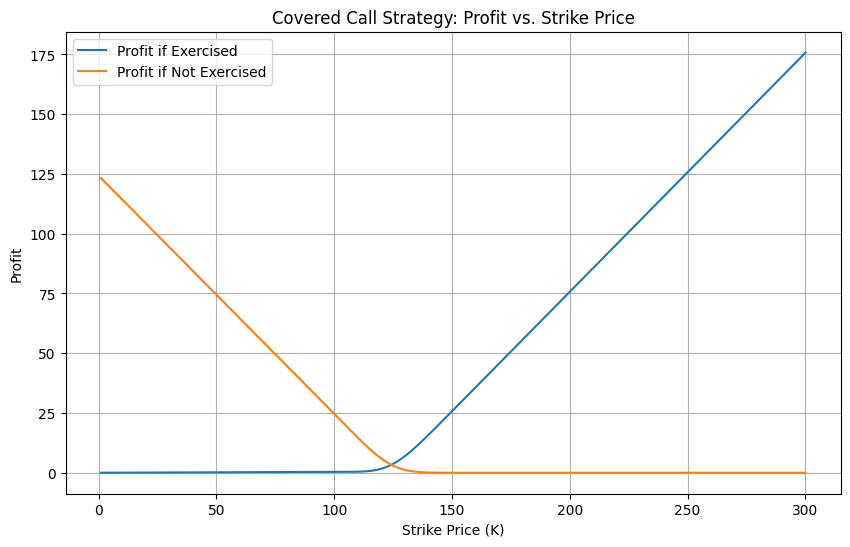

In [47]:
import matplotlib.pyplot as plt
import numpy as np
# Range of strike prices
K_values = np.arange(1, 301, 1)

# Lists to hold profits
profits_if_exercised = []
profits_if_not_exercised = []

# Calculate profits for each strike price
for K in K_values:
    profit_if_exercised, profit_if_not_exercised = covered_call(S, K, T, r, vol)
    profits_if_exercised.append(profit_if_exercised)
    profits_if_not_exercised.append(profit_if_not_exercised)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(K_values, profits_if_exercised, label='Profit if Exercised')
plt.plot(K_values, profits_if_not_exercised, label='Profit if Not Exercised')
plt.xlabel('Strike Price (K)')
plt.ylabel('Profit')
plt.title('Covered Call Strategy: Profit vs. Strike Price')
plt.legend()
plt.grid(True)
plt.show()

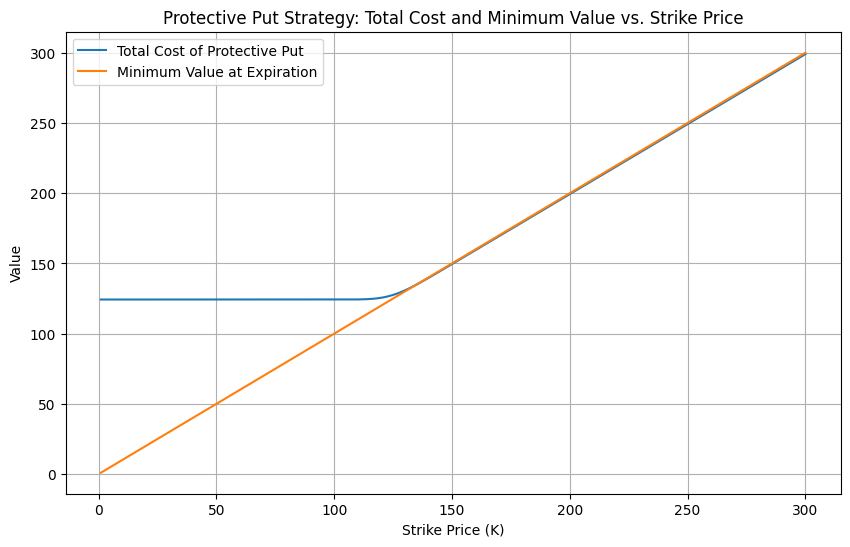

In [48]:
# Range of strike prices
K_values = np.arange(1, 301, 1)

# Lists to hold values
total_costs = []
minimum_values = []

# Calculate total cost and minimum value for each strike price
for K in K_values:
    total_cost, minimum_value = protective_put(S, K, T, r, vol)
    total_costs.append(total_cost)
    minimum_values.append(minimum_value)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(K_values, total_costs, label='Total Cost of Protective Put')
plt.plot(K_values, minimum_values, label='Minimum Value at Expiration')
plt.xlabel('Strike Price (K)')
plt.ylabel('Value')
plt.title('Protective Put Strategy: Total Cost and Minimum Value vs. Strike Price')
plt.legend()
plt.grid(True)
plt.show()